<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">About the Dataset</h2>

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries, Metrics</h1>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [21]:
df = pd.read_csv("train.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

***Taking a look at the first 5 rows of the dataset***

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Checking the shape—i.e. size—of the data***

In [23]:
df.shape

(1460, 81)

***Learning the dtypes of columns' and how many non-null values are there in those columns***

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

***Getting the statistical summary of dataset***

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


***Visualizing the correlations between numerical variables***

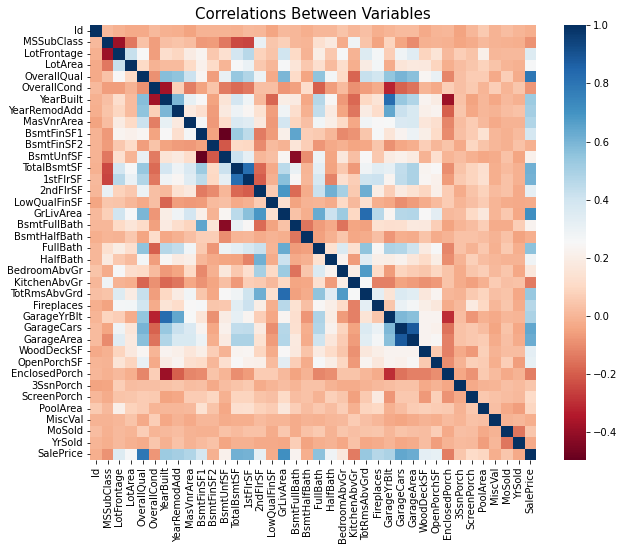

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Selection</h1>

***We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.***

In [27]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

***Checking for the missing values***

In [28]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Visualization</h1>

***Visualizing the Correlation between the numerical variables using pairplot visualization***

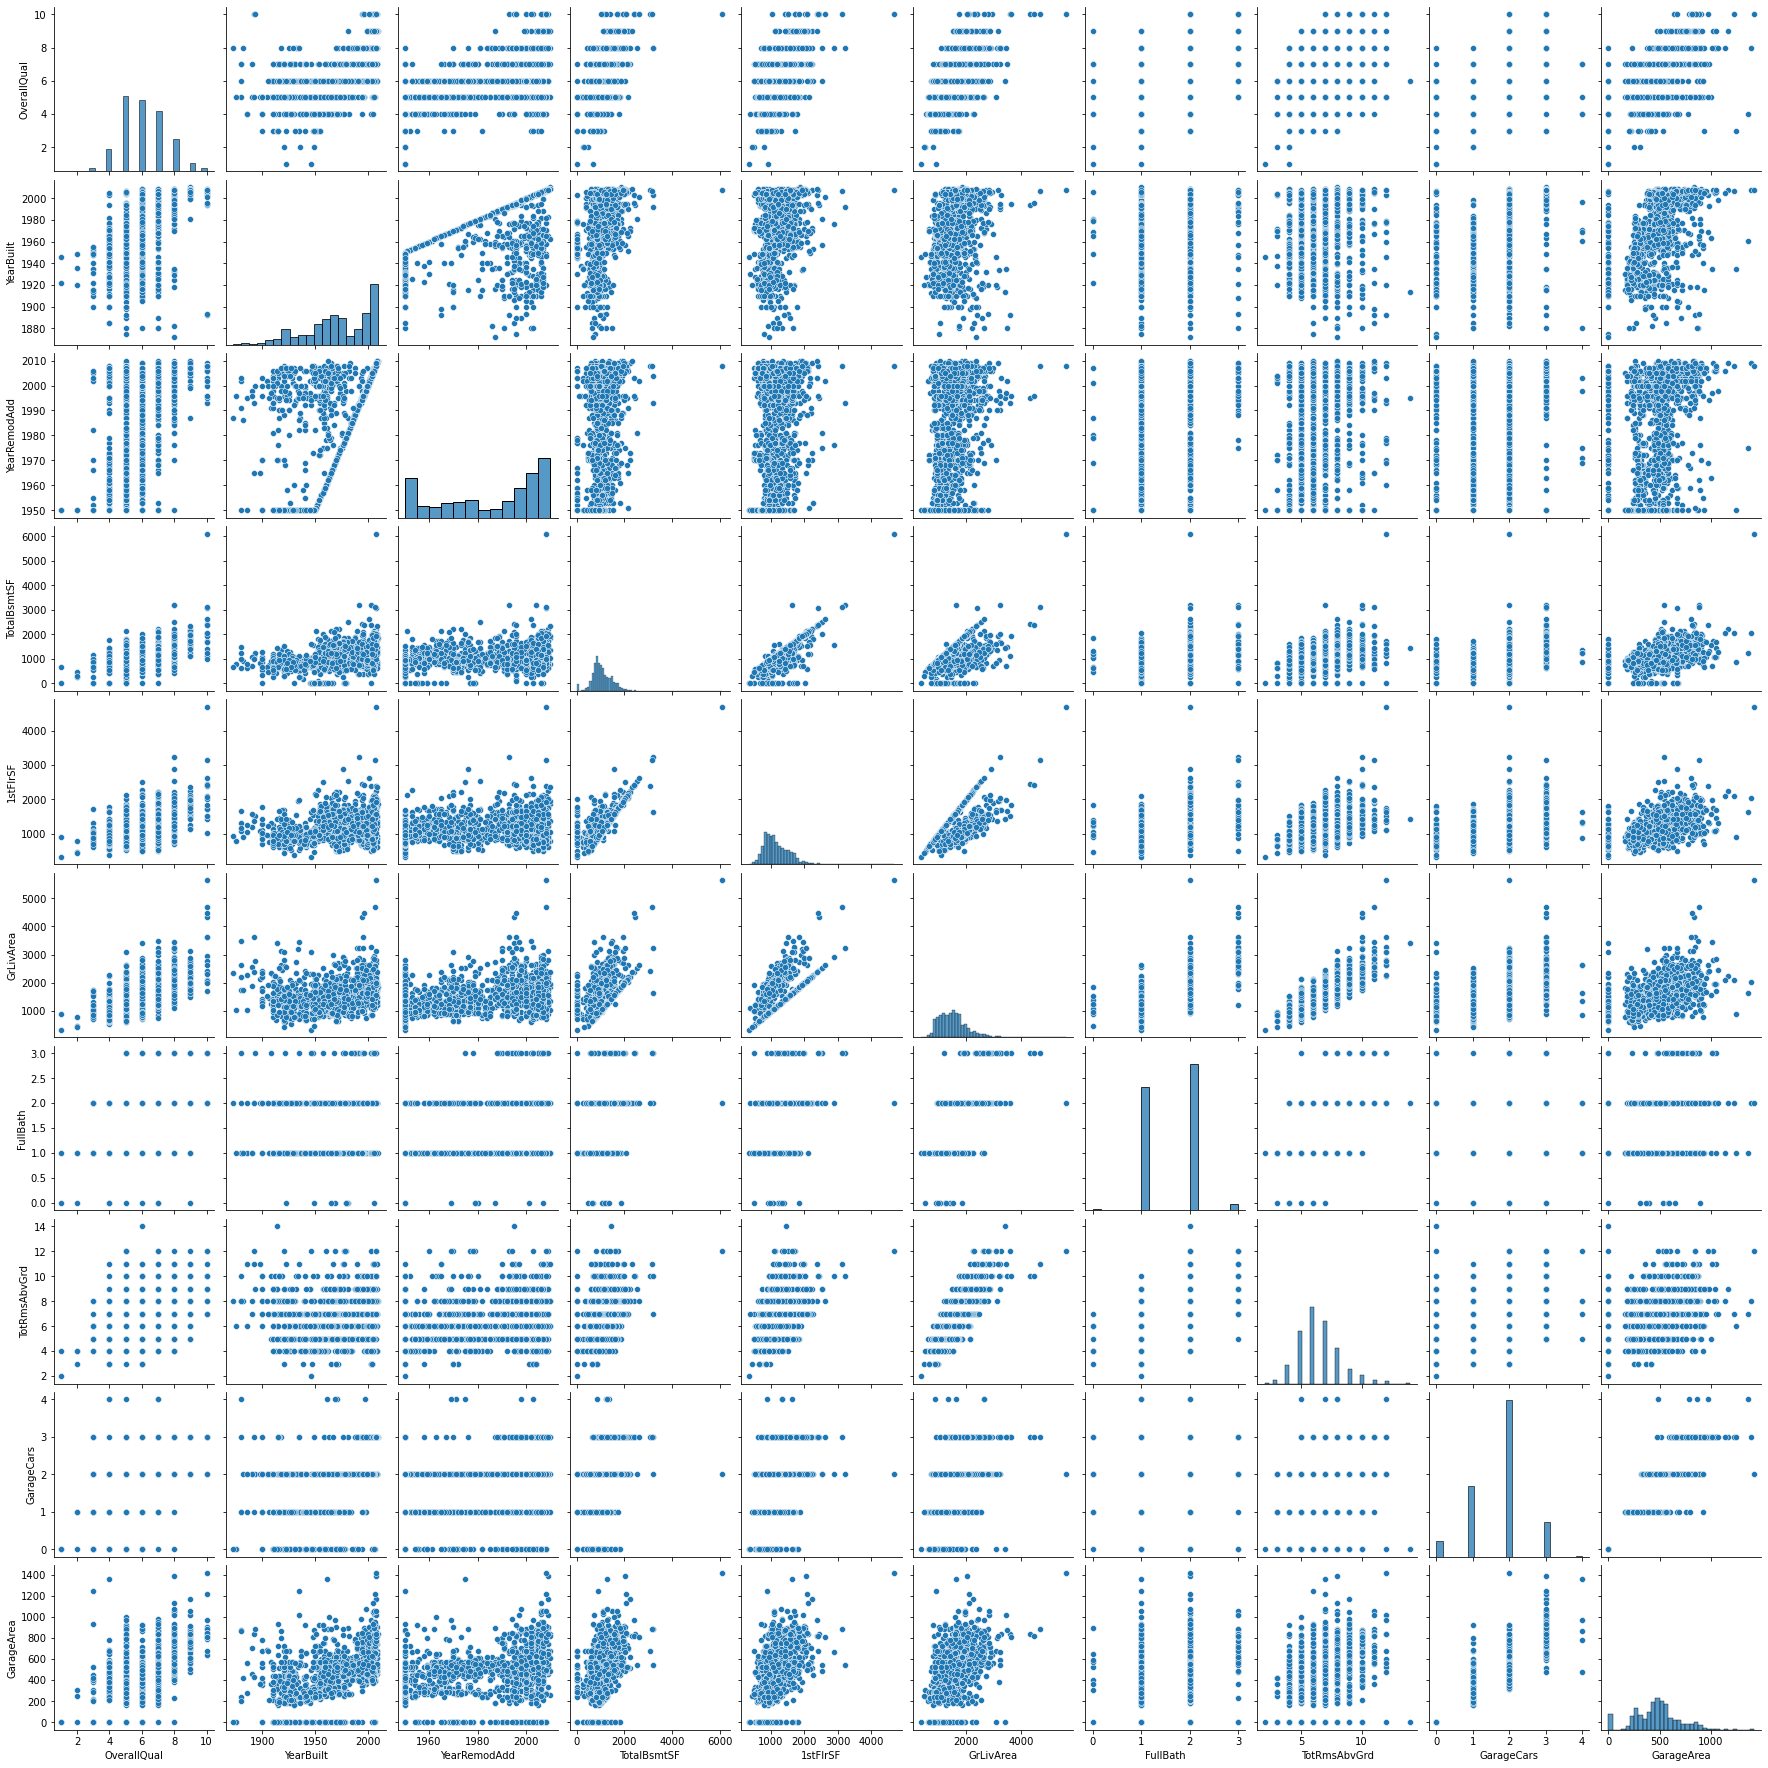

In [46]:
sns.pairplot(df[important_num_cols])

***Visualizing the Correlation between each column and the target variable using jointplot visualization***

<Figure size 720x576 with 0 Axes>

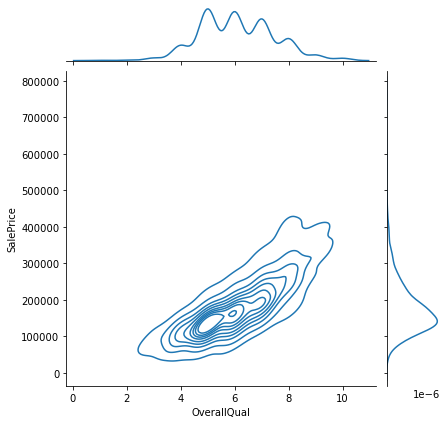

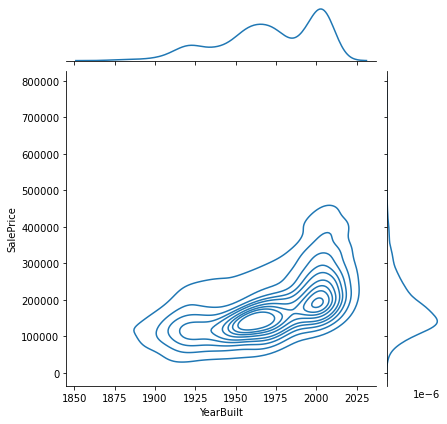

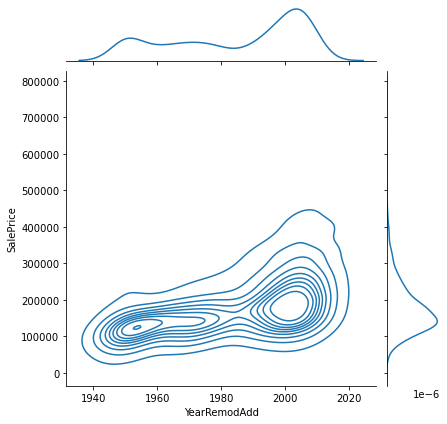

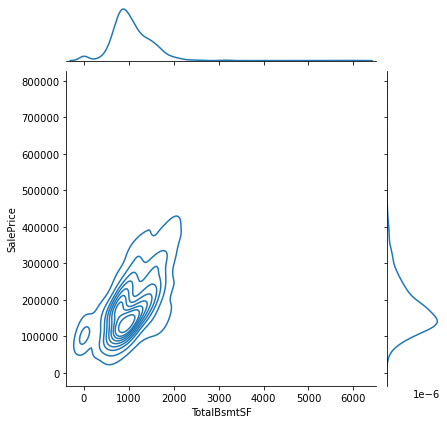

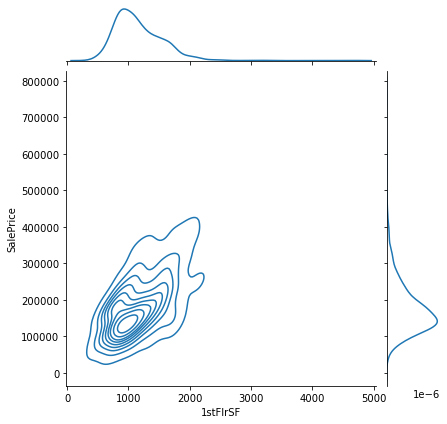

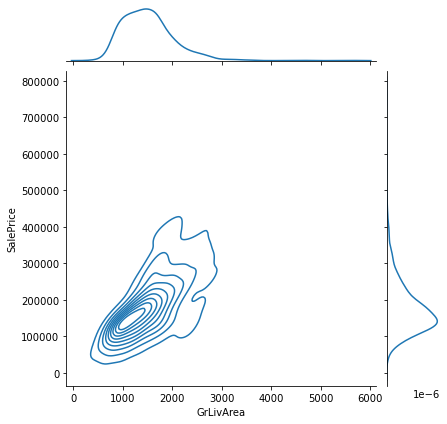

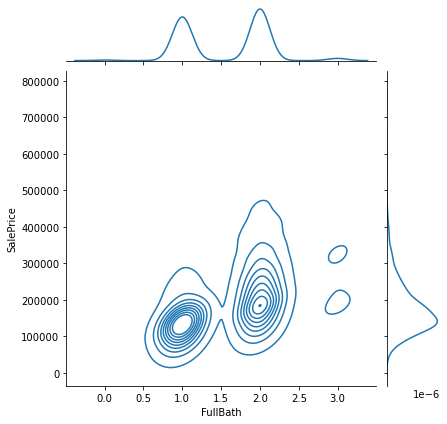

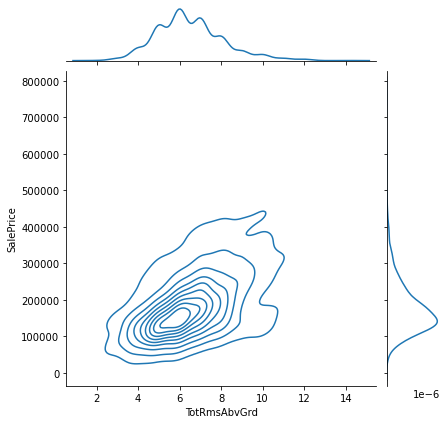

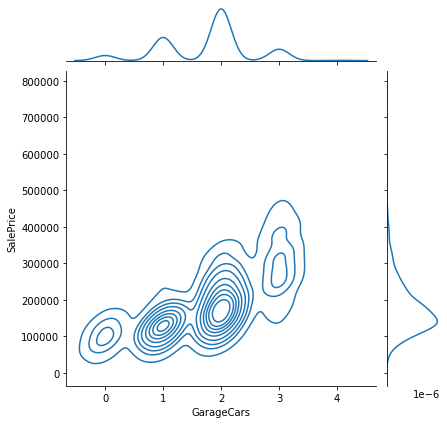

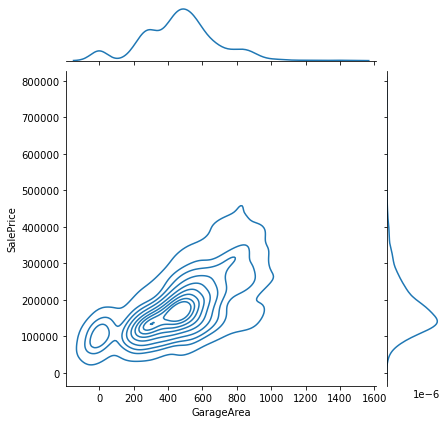

In [30]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="kde")
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">X, y Split</h1>

***Splitting the data into X and y chunks***

In [31]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">One-Hot Encoding</h1>

***Encoding the categorical features in X dataset by using One-Hot Encoding method***

In [32]:
X = pd.get_dummies(X, columns=cat_cols)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

***Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:***

<center><img width="300px" src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF"></center>

In [33]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

***As you can see, standardization is done successfully***

In [34]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

***Splitting the data into Train and Test chunks for better evaluation***

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Defining several evaluation functions for convenience***

In [36]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Machine Learning Models</h1>

In [37]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23567.890565943395
MSE: 1414931404.6297863
RMSE: 37615.57396384889
R2 Score: 0.8155317822983865
------------------------------
RMSE Cross-Validation: 35933.12897629361


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [39]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23435.503712008256
MSE: 1404264216.859559
RMSE: 37473.513537691644
R2 Score: 0.8169224907874507
------------------------------
RMSE Cross-Validation: 35887.85279159834


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [40]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23560.45808027237
MSE: 1414337628.5020955
RMSE: 37607.6804456496
R2 Score: 0.8156091944072918
------------------------------
RMSE Cross-Validation: 35922.769368760746


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [41]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18119.084092058056
MSE: 971825287.3028067
RMSE: 31174.11245413102
R2 Score: 0.8733006574880475
------------------------------
RMSE Cross-Validation: 31181.477487179713


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [42]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17439.918396832192
MSE: 716579004.5214689
RMSE: 26768.993341578403
R2 Score: 0.9065777666861116
------------------------------
RMSE Cross-Validation: 29698.84961808251


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The less the Root Mean Squared Error (RMSE), The better the model is.***

In [43]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
4,XGBRegressor,17439.918397,7.165790e+08,26768.993342,0.906578,29698.849618
3,RandomForestRegressor,18119.084092,9.718253e+08,31174.112454,0.873301,31181.477487
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792
2,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
0,LinearRegression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976


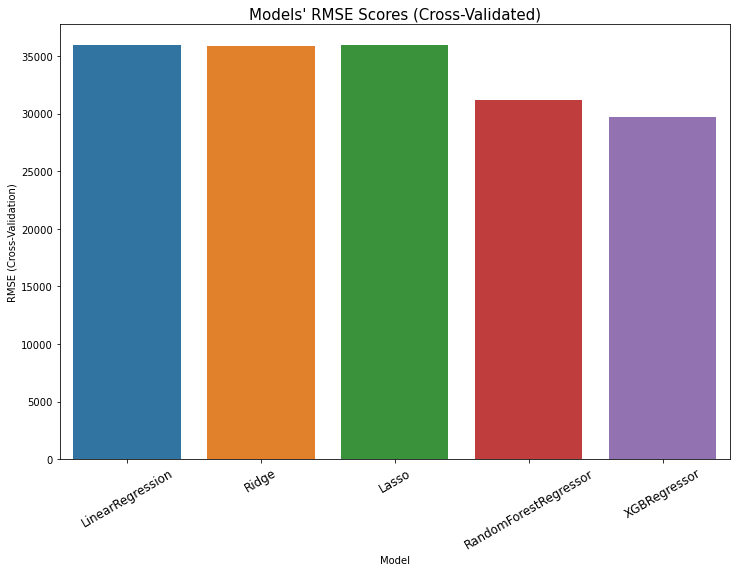

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()